# TIME SERIES ANALYSIS AND PIVOTING USING PANDAS
*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/



### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset

In [3]:
data = pd.read_csv("country_vaccinations",encoding='ISO-8859-1')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


### Checking for missing values

In [5]:
data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     27954
people_vaccinated                      29530
people_fully_vaccinated                32326
daily_vaccinations_raw                 33871
daily_vaccinations                       333
total_vaccinations_per_hundred         27954
people_vaccinated_per_hundred          29530
people_fully_vaccinated_per_hundred    32326
daily_vaccinations_per_million           333
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

### Replacing NaN values with 0

In [6]:
data.fillna(0,inplace=True)

#drop all countries with iso_code = 0
data.drop(data.index[data['iso_code']==0],inplace=True)

### Updating DateTime

In [7]:
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')

### Dropping unnecessary columns

In [8]:
data.drop(['people_fully_vaccinated','daily_vaccinations_raw','people_fully_vaccinated_per_hundred',
         'daily_vaccinations_per_million','people_vaccinated_per_hundred','source_name', 'source_website'],axis=1,inplace=True)

### India and Covid-19

In [9]:
data_India = data[data['iso_code'] == 'IND'].copy()
data_India.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
24624,India,IND,2021-01-15,0.0,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
24625,India,IND,2021-01-16,191181.0,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
24626,India,IND,2021-01-17,224301.0,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V"
24627,India,IND,2021-01-18,454049.0,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V"
24628,India,IND,2021-01-19,674835.0,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [10]:
data_India.drop(data_India.index[data_India['total_vaccinations']==0],inplace=True)

### Plot Total vaccinations

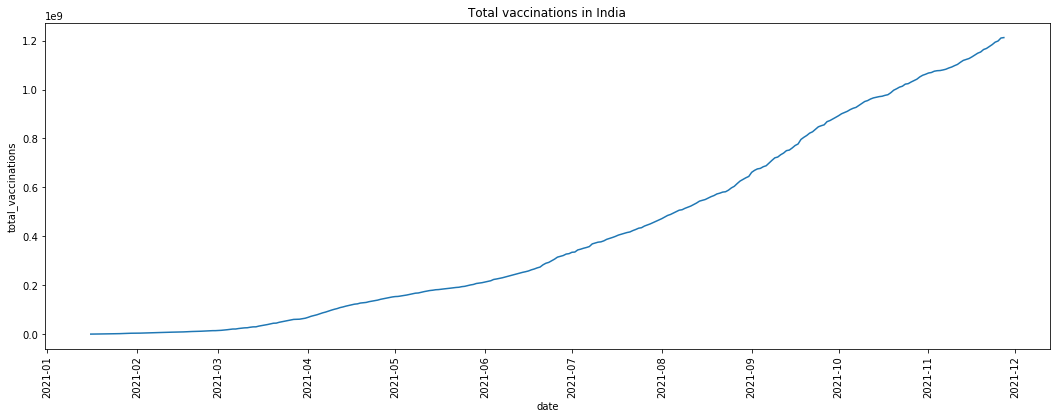

In [11]:
plt.figure(figsize=(18,6))
sns.lineplot(data=data_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India")
plt.xticks(rotation=90)
plt.show()

### Plot daily vaccination

Text(0.5, 1.0, 'Daily vaccinations in India')

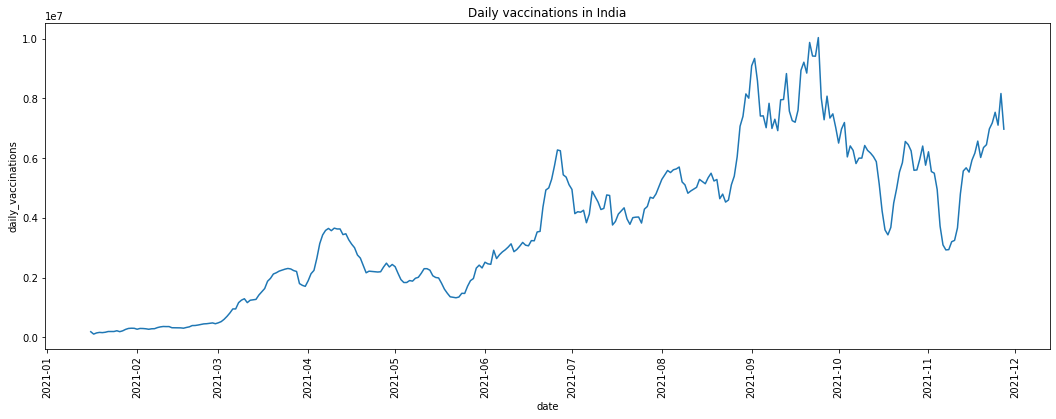

In [12]:
plt.figure(figsize=(18,6))
sns.lineplot(data=data_India, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in India")

### Vacine in India

In [13]:
vacc_names = data_India.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names.index[0]

'Covaxin, Oxford/AstraZeneca, Sputnik V'

In [14]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [15]:
text = "" #empty string

In [16]:
#iterating through data and appending to text string
for x in data["vaccines"][:500]:
    vaccines = x.split(',')
    for vacc in vaccines:
        text = text + " " + vacc.strip()

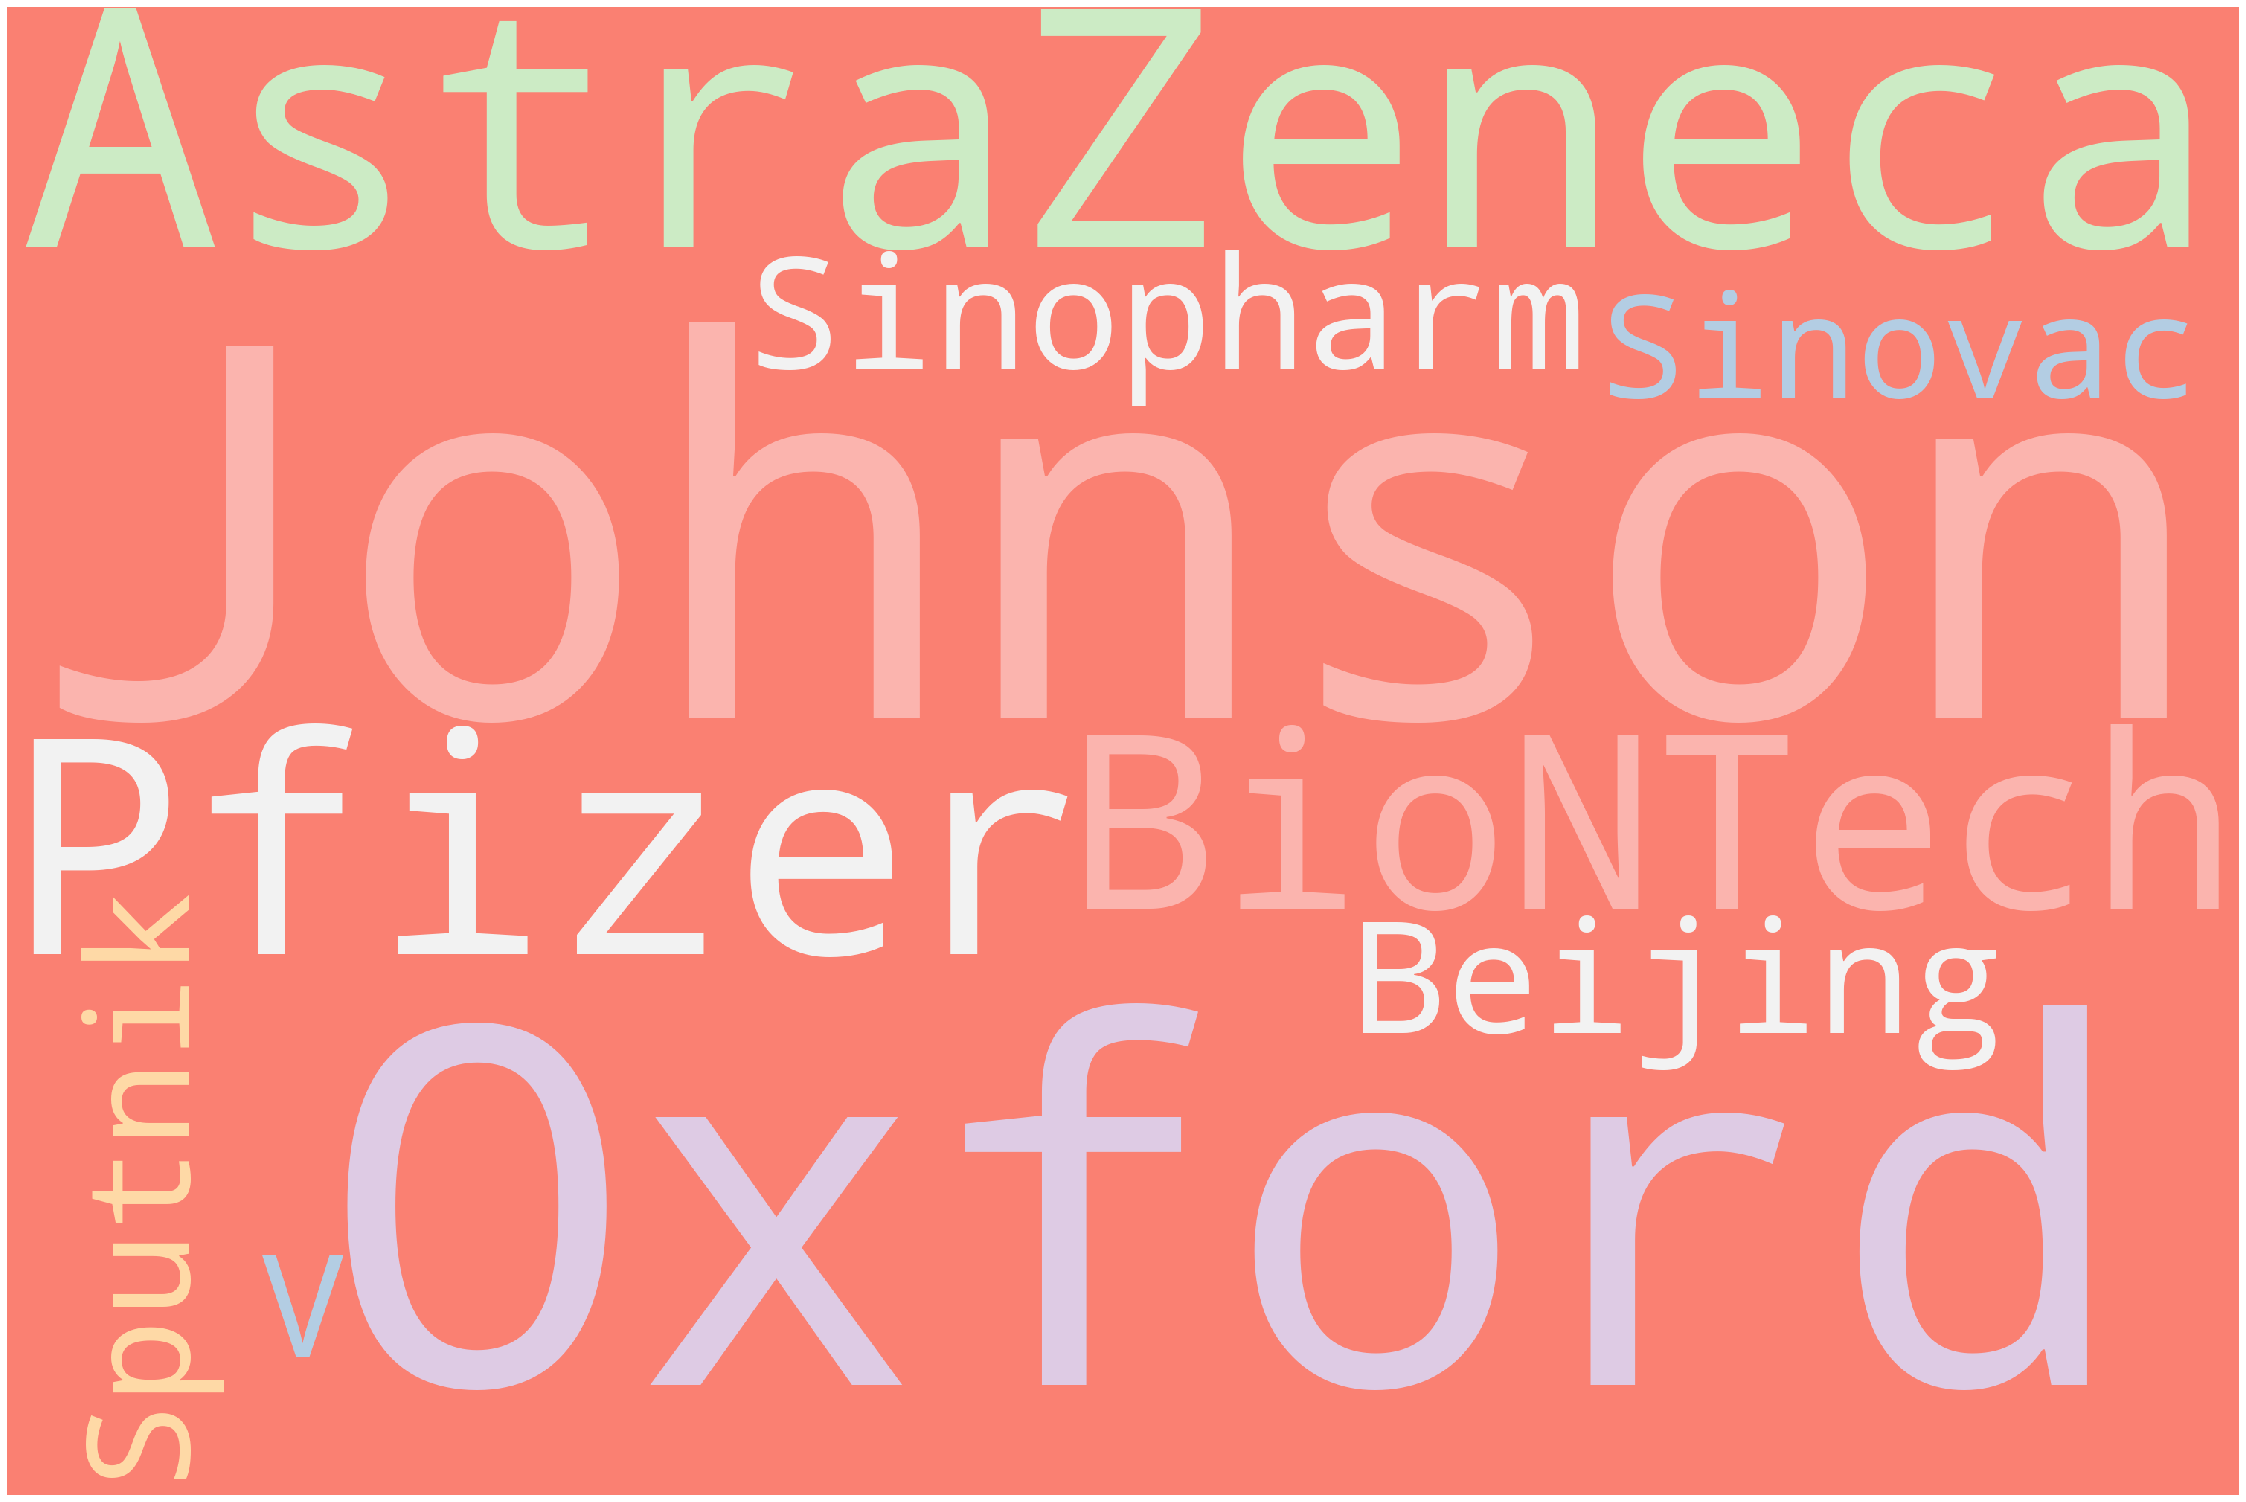

In [17]:
# Import package
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000,
                      random_state=1, background_color='salmon',
                      colormap='Pastel1', collocations=False,
                      stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

### Pivot table

#### Daily Avg Vaccination by Country

In [18]:
table = pd.pivot_table(data,index=["iso_code"],values=['daily_vaccinations'], aggfunc=np.mean)
table

,daily_vaccinations
iso_code,
ABW,571.704918
AFG,16807.250000
AGO,32357.888476
AIA,67.013841
ALB,6436.293750
...,...
WSM,1099.734694
YEM,3803.487310
ZAF,87679.193662


#### Avg Vaccine Taken In last 10 Days

In [19]:
table = pd.pivot_table(data,index=["date"],values=['daily_vaccinations'], aggfunc=np.mean)
table.tail(10)

,daily_vaccinations
date,
2021-11-18,162290.804348
2021-11-19,159002.273224
2021-11-20,173630.047904
2021-11-21,171191.378049
2021-11-22,184886.933333
2021-11-23,203939.125000
2021-11-24,214062.008130
2021-11-25,262139.155556
2021-11-26,325712.824324
